# Pandas - Muhammad Qasim - 17/01/2021

A fundamental part of the data scientist’s toolkit is data visualization. Although it is
very easy to create visualizations, it’s much harder to produce good ones.

There are two primary uses for data visualization:
- To explore data
- To communicate data

### matplotlib
A wide variety of tools exists for visualizing data. We will be using the matplotlib library, which is widely used (although sort of showing its age). If you are interested in producing elaborate interactive visualizations for the Web, it is likely not the right choice, but for simple bar charts, line charts, and scatterplots, it works pretty well. In particular, we will be using the matplotlib.pyplot module. In its simplest use, pyplot maintains an internal state in which you build up a visualization step by step. Once you’re done, you can save it (with savefig()) or display it (with show()). For example, making simple plots (like Figure 3-1) is pretty simple:

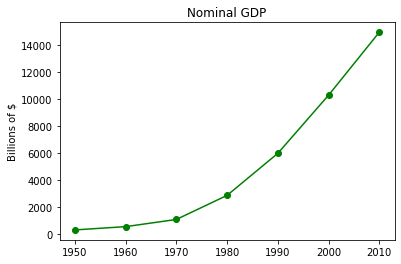

In [1]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

# Bar Charts
A bar chart is a good choice when you want to show how some quantity varies among
some discrete set of items. For instance, Figure 3-2 shows how many Academy
Awards were won by each of a variety of movies:


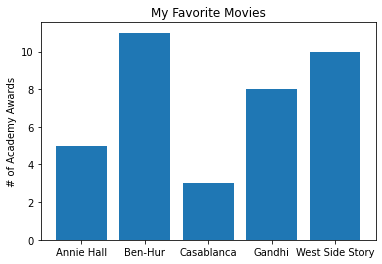

In [2]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i+0.1 for i, _ in enumerate(movies)], movies)
plt.show()

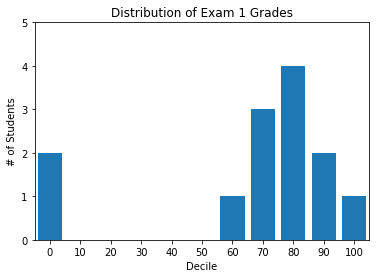

In [3]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10

histogram = Counter(decile(grade) for grade in grades)
plt.bar([x for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(), # give each bar its correct height
        8) # give each bar a width of 8
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
 # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()



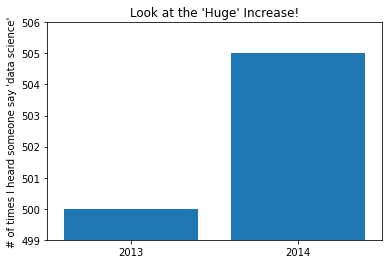

Figure 3-4. A chart with a misleading y-axis


In [4]:
mentions = [500, 505]
years = [2013, 2014]
#plt.bar([2012.6, 2013.6], mentions, 0.8) # Old method to plot bat on center 

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1

# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()
print("Figure 3-4. A chart with a misleading y-axis")

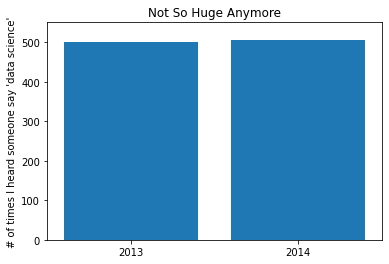

Figure 3-5. A chart with a misleading y-axis


In [5]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1

# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()
print("Figure 3-5. A chart with a misleading y-axis")


# Line Charts
As we saw already, we can make line charts using plt.plot(). These are a good
choice for showing trends, as illustrated in Figure 3-6:


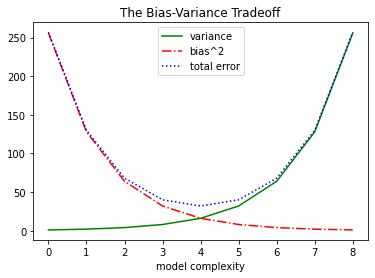

In [6]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

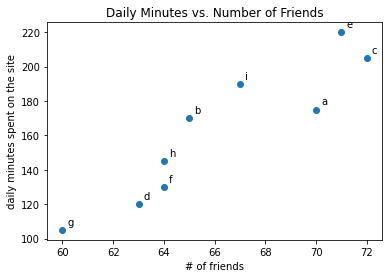

Figure 3-7. A scatterplot of friends and time on the site


In [7]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
# label each point



for label, friend_count, minute_count in zip(labels, friends, minutes):
 plt.annotate(label,
 xy=(friend_count, minute_count), # put the label with its point
 xytext=(5, 5), # but slightly offset
 textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()
print("Figure 3-7. A scatterplot of friends and time on the site")

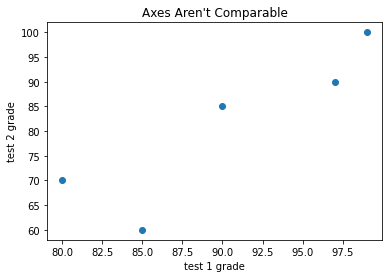

Figure 3-8. A scatterplot with uncomparable axes


In [8]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()
print("Figure 3-8. A scatterplot with uncomparable axes")

If we include a call to plt.axis("equal"), the plot (Figure 3-9) more accurately
shows that most of the variation occurs on test 2.
That’s enough to get you started doing visualization. We’ll learn much more about
visualization throughout the book.


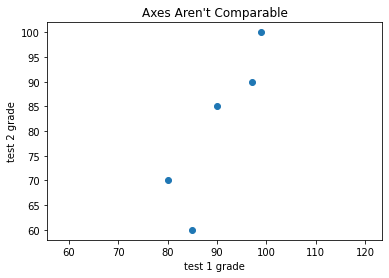

Figure 3-9. The same scatterplot with equal axes


In [9]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.axis("equal")
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()
print("Figure 3-9. The same scatterplot with equal axes")